In [1]:
import pandas as pd


In [34]:
manifest_path = "/private/home/francoisporcher/kinetics_400_embeddings_vjepa2_vitl_fpc64_256/manifest.csv"
df = pd.read_csv(manifest_path)

In [3]:
df

,video_path,index,out_path,padded,failed,error,n_frames,feature_shape
0,/checkpoint/abardes/datasets/Kinetics400/train...,0,/private/home/francoisporcher/kinetics_400_emb...,False,False,NaN,250,"(8192, 1024)"
1,/checkpoint/abardes/datasets/Kinetics400/train...,0,/private/home/francoisporcher/kinetics_400_emb...,False,False,NaN,250,"(8192, 1024)"
2,/checkpoint/abardes/datasets/Kinetics400/train...,0,/private/home/francoisporcher/kinetics_400_emb...,False,False,NaN,300,"(8192, 1024)"
3,/checkpoint/abardes/datasets/Kinetics400/train...,0,/private/home/francoisporcher/kinetics_400_emb...,False,False,NaN,300,"(8192, 1024)"
4,/checkpoint/abardes/datasets/Kinetics400/train...,0,/private/home/francoisporcher/kinetics_400_emb...,False,False,NaN,250,"(8192, 1024)"
...,...,...,...,...,...,...,...,...
234147,/checkpoint/abardes/datasets/Kinetics400/train...,399,/private/home/francoisporcher/kinetics_400_emb...,False,False,NaN,300,"(8192, 1024)"
234148,/checkpoint/abardes/datasets/Kinetics400/train...,399,/private/home/francoisporcher/kinetics_400_emb...,False,False,NaN,300,"(8192, 1024)"
234149,/checkpoint/abardes/datasets/Kinetics400/train...,399,/private/home/francoisporcher/kinetics_400_emb...,False,False,NaN,300,"(8192, 1024)"
234150,/checkpoint/abardes/datasets/Kinetics400/train...,399,/private/home/francoisporcher/kinetics_400_emb...,False,False,NaN,300,"(8192, 1024)"


# How many are padded

In [ ]:
import numpy as np
print(np.sum(df['padded'] == True) / df.shape[0])

0.046051282927329254


# How many failed

In [13]:
print("Number of failed", np.sum(df['failed'] == True))

Number of failed 0


# Number of errors

In [17]:
df['error'].unique()

array([nan])

# Number of frames

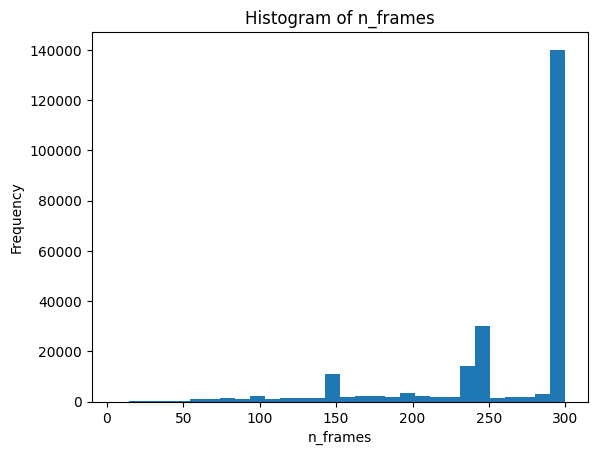

In [22]:
import matplotlib.pyplot as plt

plt.hist(df['n_frames'], bins=30)  # adjust bins if needed
plt.xlabel("n_frames")
plt.ylabel("Frequency")
plt.title("Histogram of n_frames")
plt.show()


In [26]:
print("Proportion of clips with more frames that the context (128)", np.sum((df['n_frames'] > 128)) / df.shape[0])

Proportion of clips with more frames that the context (128) 0.9532525880624552


# Proportion of information used

In [29]:
used_frames = df['n_frames'].clip(upper=128).sum()
total_frames = df['n_frames'].sum()

proportion_used = used_frames / total_frames
print("Proportion of total frames used", proportion_used)


Proportion of total frames used 0.4810220770908102


# There is an extra value to remove

In [30]:
df.shape[0]

234152

In [32]:
df['video_path']

0         /checkpoint/abardes/datasets/Kinetics400/train...
1         /checkpoint/abardes/datasets/Kinetics400/train...
2         /checkpoint/abardes/datasets/Kinetics400/train...
3         /checkpoint/abardes/datasets/Kinetics400/train...
4         /checkpoint/abardes/datasets/Kinetics400/train...
                                ...                        
234147    /checkpoint/abardes/datasets/Kinetics400/train...
234148    /checkpoint/abardes/datasets/Kinetics400/train...
234149    /checkpoint/abardes/datasets/Kinetics400/train...
234150    /checkpoint/abardes/datasets/Kinetics400/train...
234151    /checkpoint/abardes/datasets/Kinetics400/train...
Name: video_path, Length: 234152, dtype: object

In [33]:
234152 // 8

29269

In [35]:
import pandas as pd

man = pd.read_csv(manifest_path)

# Find duplicate entries (same source sample)
dupe_mask = man.duplicated(subset=["video_path", "index"], keep=False)
dupes = man[dupe_mask].sort_values(["video_path", "index"])

# Prefer successes over failures when deduping
clean = (
    man.sort_values(["failed"])  # False (0) comes before True (1)
       .drop_duplicates(subset=["video_path", "index"], keep="first")
)

print("Total rows:", len(man))
print("Unique samples:", len(clean))
print("Duplicates removed:", len(man) - len(clean))

Total rows: 234152
Unique samples: 234145
Duplicates removed: 7


In [37]:
clean.to_csv(manifest_path, index=False)

In [38]:
df = pd.read_csv(manifest_path)

In [39]:
df

,video_path,index,out_path,padded,failed,error,n_frames,feature_shape
0,/checkpoint/abardes/datasets/Kinetics400/train...,0,/private/home/francoisporcher/kinetics_400_emb...,False,False,NaN,250,"(8192, 1024)"
1,/checkpoint/abardes/datasets/Kinetics400/train...,123,/private/home/francoisporcher/kinetics_400_emb...,False,False,NaN,250,"(8192, 1024)"
2,/checkpoint/abardes/datasets/Kinetics400/train...,123,/private/home/francoisporcher/kinetics_400_emb...,False,False,NaN,150,"(8192, 1024)"
3,/checkpoint/abardes/datasets/Kinetics400/train...,123,/private/home/francoisporcher/kinetics_400_emb...,False,False,NaN,300,"(8192, 1024)"
4,/checkpoint/abardes/datasets/Kinetics400/train...,123,/private/home/francoisporcher/kinetics_400_emb...,False,False,NaN,300,"(8192, 1024)"
...,...,...,...,...,...,...,...,...
234140,/checkpoint/abardes/datasets/Kinetics400/train...,260,/private/home/francoisporcher/kinetics_400_emb...,False,False,NaN,300,"(8192, 1024)"
234141,/checkpoint/abardes/datasets/Kinetics400/train...,260,/private/home/francoisporcher/kinetics_400_emb...,True,False,NaN,69,"(8192, 1024)"
234142,/checkpoint/abardes/datasets/Kinetics400/train...,260,/private/home/francoisporcher/kinetics_400_emb...,False,False,NaN,143,"(8192, 1024)"
234143,/checkpoint/abardes/datasets/Kinetics400/train...,260,/private/home/francoisporcher/kinetics_400_emb...,False,False,NaN,240,"(8192, 1024)"
